# Generating Data - Lab

## Introduction

In this lab, we shall practice some of the data generation techniques that we saw in earlier lesson to generate datasets for regression and classification purposes. We shall run a couple of simple simulations to help us generate different dataset by controlling noise and variance parameters in the data generation process. We shall look at the statistical indicators and visual output to see how these parameters effect the accuracy of an algorithm. 

## Objectives
You will be able to:

- Generate datasets for classification problems
- Generate datasets for regression problems

## Task 1

Create a function `reg_simulation()` to run a regression simulation creating a number of datasets with `make_regression()` data generation function. Perform following tasks:

* Create `reg_simulation()` with n (noise) and random state input parameters
    * Make a regression dataset (X,y) with 100 samples using  given noise value and random state
    * Plot the data as scatter plot 
    * Calculate and plot a regression line on the plot and calculate R2 (you can do this in statsmodels or sklearn)
    * Label the plot with noise, and calculated r-squared
    
* Pass a fixed random state and values from `[10, 25, 40, 50, 100, 200]` as noise values iteratively to the function above. 
* Inspect and comment on the output.

In [16]:
n

200

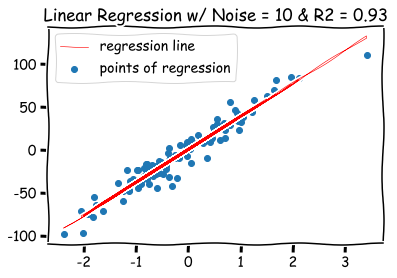

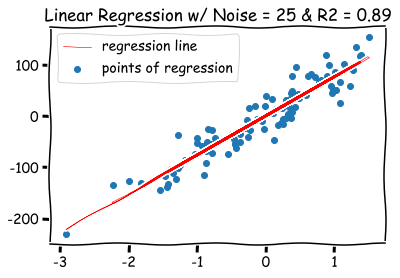

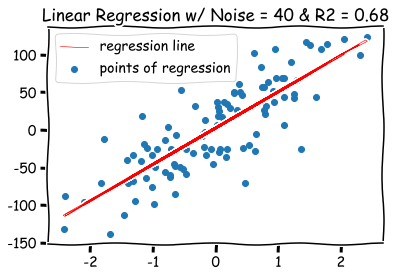

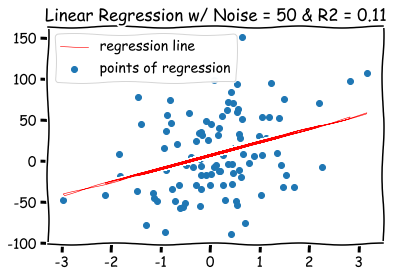

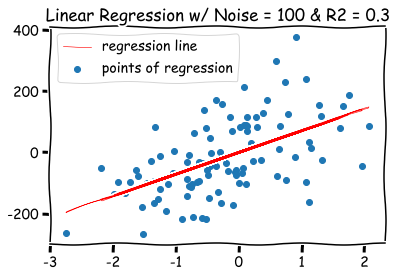

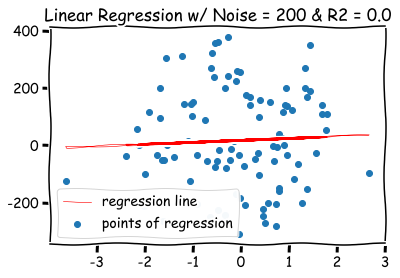

In [35]:
# import necessary libraries
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.xkcd()

def reg_simulation(n, random_state):
    
    # Generate X and y
    X,y = make_regression(100, n_features=1, noise=n, random_state=random_state)
    plt.scatter(X,y, label='points of regression')
    # Use X,y to draw a scatter plot
    reg = LinearRegression().fit(X,y)
    plt.plot(X, reg.predict(X), c='red', label='regression line', lw=0.6)
    plt.title(f'Linear Regression w/ Noise = {n} & R2 = {round(reg.score(X,y),2)}')
    # Fit a linear regression model to X , y and calculate r2
    # label and plot the regression line
    plt.legend()
    plt.show()




for n in [10, 25, 40, 50, 100, 200]:
    reg_simulation(n, random_state)

## Task 2

As above, we shall now try to run a classification problem using a Linear SVM classifier. This will be covered in detail in an upcoming section, so here we shall give you the necessary code for fitting the classifier and calculating the decision boundary. The idea here to keep the code simple and focus the effect of generated data on the classifier performance. 

For this you need to perform following tasks 
* Create classification_simulation function with random state and std (standard deviation) as input parameters
    * Use `make_blobs()` to create a classification dataset with 100 samples, 2 features/centres and use provided random state and standard deviation values for placing data
    * Plot the values on a scatter plot, while color coding both classes
    * Use unsupervised SVM to classify the data (given)
    * Calculate the decision boundary from SVM output (given)
    * Plot the decision boundary on the scatter plot
   
* Pass a fixed random state and values from [0,0.5, 1, 1.5, 2, 2.5, 3]] as standard deviation (std) values iteratively to the function above.

* Inspect and comment on the output.


In [67]:
clf = LinearSVC().fit(X, y)
clf.coef_[0]

/Users/yuhaoyang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([-0.0695406, -0.0544581])

/Users/yuhaoyang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


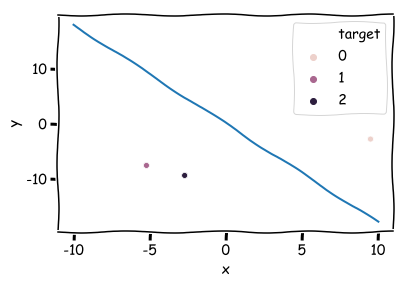

/Users/yuhaoyang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


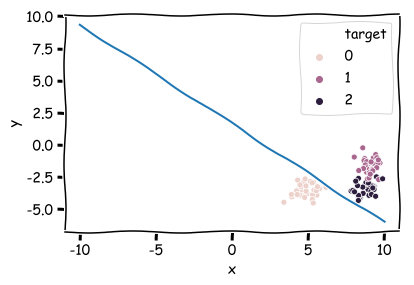

/Users/yuhaoyang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


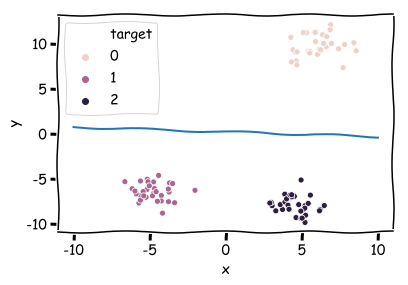

/Users/yuhaoyang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


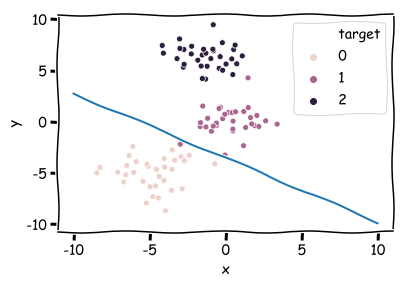

/Users/yuhaoyang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


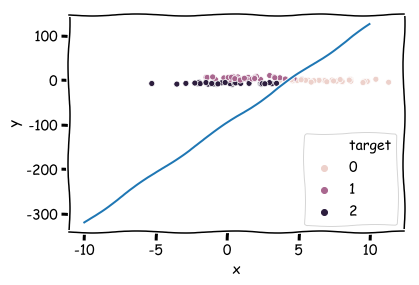

/Users/yuhaoyang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


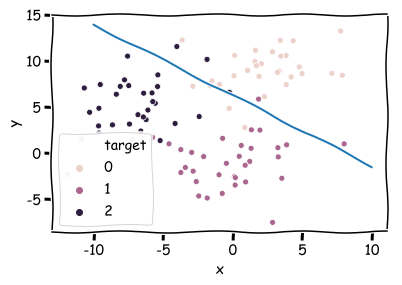

/Users/yuhaoyang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


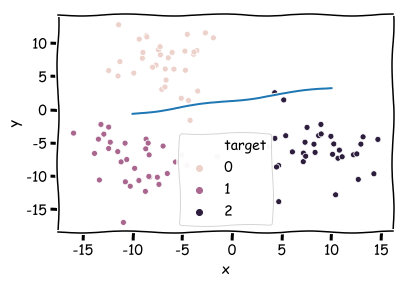

In [70]:
# import necessary ibraries
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import seaborn as sns
import pandas as pd

def classification_simulation(random_state, std):
    X,y = make_blobs(n_samples=100, n_features=2, cluster_std=std, random_state=random_state)
    df = pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
    df.columns = ['x','y','target']
    sns.scatterplot('x','y', hue='target', data=df)
    # Create X, y (2 classes) and make a color coded scatter plot
    
    # Fit an SVM model
    clf = LinearSVC().fit(X, y)
    
    # get the Separating hyperplane i.e. the decision boundary
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-10, 10)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the decision line with xx and yy calculated above
    plt.plot(xx, yy)
    plt.show()
    # label and show the plot
    pass

random_state = None

for std in [0,0.5, 1, 1.5, 2, 2.5, 3]:
    classification_simulation(random_state, std)


## Summary 

In this lesson, we learned how to generate random datasets in classification and regression contexts. we ran two simulations for this and fitted simple models to view the effect of random data parameters including noise level and std on the performance of parameters, visually as well as objectively. These skills will come in handy while testing model performance and robustness in future. 